# **ML_Assignment_3-Regression**

### ***Regression Assignment Objective: The objective of this assignment is to evaluate the understanding of regression techniques in supervised learning by applying them to a real-world dataset.***

#### ****Dataset: Using the California Housing dataset available in the sklearn library. This dataset contains information about various features of houses in California and their respective median prices.****

#### Loading and Preprocessing: 

##### . Loading the California Housing dataset using the fetch_california_housing function from sklearn. Converting the dataset into a pandas DataFrame for easier handling. 
##### . Handling thr missing values (if any) and performing the necessary feature scaling (e.g., standardization). 
##### . Explaining the preprocessing.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context 
## This completely disables SSL certificate verification for any HTTPS connections.

In [3]:
# Loading the California housing dataset
HousingData = fetch_california_housing()
# Creating a dataframe using the feature data and column names
df = pd.DataFrame(HousingData.data, columns=HousingData.feature_names)
# Adding the target column (median house value) to the dataframe
df['Target'] = HousingData.target
# Displaying the first few rows of the dataframe
print(df.head())
df

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
# Checking the null values for each coloumn
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


#### **Correlation check for feature selection**

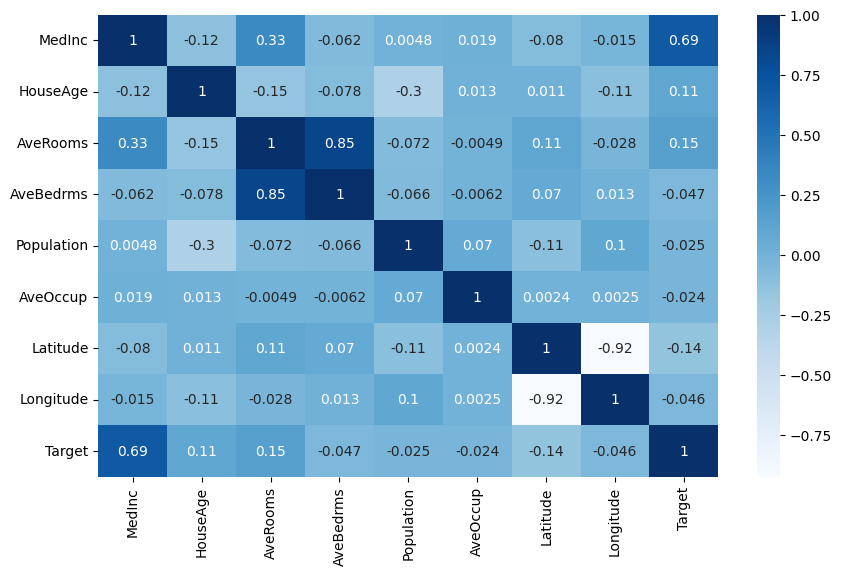

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the correlation between all features and the target
CorrelationMatrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(CorrelationMatrix, annot=True, cmap='Blues')

# Display the heatmap
plt.show()

#### **Looking for the strong correlation target**

In [6]:
x = df[['MedInc', 'AveRooms', 'HouseAge']]
y = df['Target']

#### **Processing the testing and train by splitting**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
# Initializing the scaler
scaler = StandardScaler()
# The scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)
# Using the same scaler to transform the test data
x_test_scaled = scaler.transform(x_test)

## **Regression Algorithm**

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

#### **Visualization**

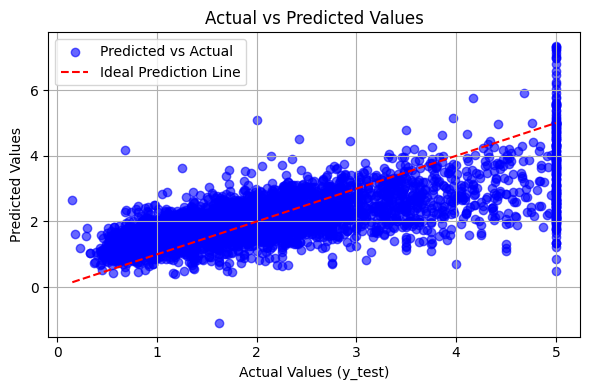

In [12]:
import matplotlib.pyplot as plt

# Predicting the target values using the model
y_predict = model.predict(x_test_scaled)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_predict, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')

# Adding labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Evaluation

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
# Printing the results
print("Linear Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE):{mse:.4f}")
print(f"Mean Absolute Error (MAE):{mae:.4f}")
print(f"R-squared Score (R²):{r2:.4f}")

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE):0.6589
Mean Absolute Error (MAE):0.6033
R-squared Score (R²):0.4972


##### The model predictions are not significantly better than simply using the mean of the y_test values as a default prediction. This indicates that the model is weak, as the differences between y_test and y_predict are larger than the differences between y_test and its mean.

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
DataModel = DecisionTreeRegressor(random_state=42)
DataModel.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
y_predictData = DataModel.predict(x_test_scaled)

#### **Visualization**

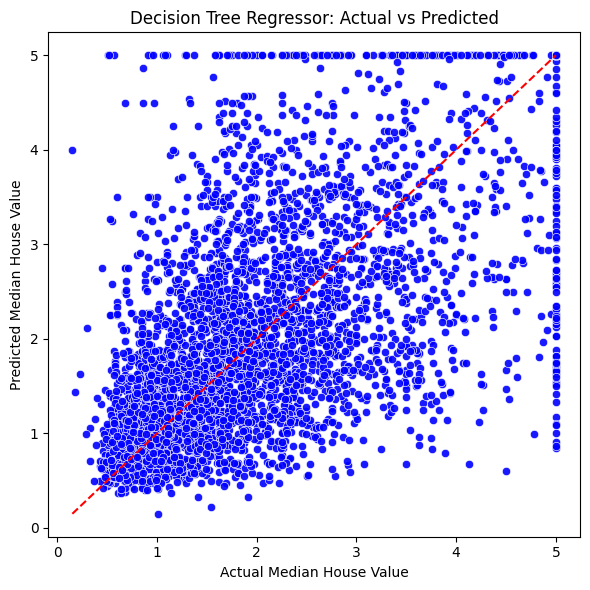

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Setting the figure size
plt.figure(figsize=(6, 6))
# Creating a scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_predictData, color='blue', alpha=0.9)
# Plotting the ideal prediction line (y = x)
min_val = min(y_test.min(), y_predictData.min())
max_val = max(y_test.max(), y_predictData.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')
# Adding axis labels and title
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Decision Tree Regressor: Actual vs Predicted")
# Showing the plot
plt.tight_layout()
plt.show()

#### Evaluation

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculating the evaluation metrics for Decision Tree Regressor
mse_Data = mean_squared_error(y_test, y_predictData)
mae_Data = mean_absolute_error(y_test, y_predictData)
r2_Data = r2_score(y_test, y_predictData)
# Printing the evaluation results
print("Decision Tree Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE):{mse_Data:.4f}")
print(f"Mean Absolute Error (MAE):{mae_Data:.4f}")
print(f"R-squared Score (R²):{r2_Data:.4f}")

Decision Tree Regressor Evaluation Metrics:
Mean Squared Error (MSE):1.1061
Mean Absolute Error (MAE):0.7538
R-squared Score (R²):0.1559


##### The model predictions are only slightly better than using the mean of y_test as a baseline, indicating that it is not a strong model. The differences between the actual values (y_test) and the predicted values (y_predict) are larger than the differences between y_test and its mean. Additionally, the model has a very low R-squared value, suggesting that it performs worse than the Linear Regression model and lacks predictive strength.

### Random Forest

#### Evaluation

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initializing and training the Random Forest Regressor
RandomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForestModel.fit(x_train_scaled, y_train)
# Predicting using the trained model
y_predict_random = RandomForestModel.predict(x_test_scaled)
# Evaluating the model
mse_random = mean_squared_error(y_test, y_predict_random)
mae_random = mean_absolute_error(y_test, y_predict_random)
r2_random = r2_score(y_test, y_predict_random)
# Displaying the evaluation metrics
print("Random Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE):{mse_random:.4f}")
print(f"Mean Absolute Error (MAE):{mae_random:.4f}")
print(f"R-squared Score (R²):{r2_random:.4f}")

Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE):0.5977
Mean Absolute Error (MAE):0.5606
R-squared Score (R²):0.5439


#### **Visualization**

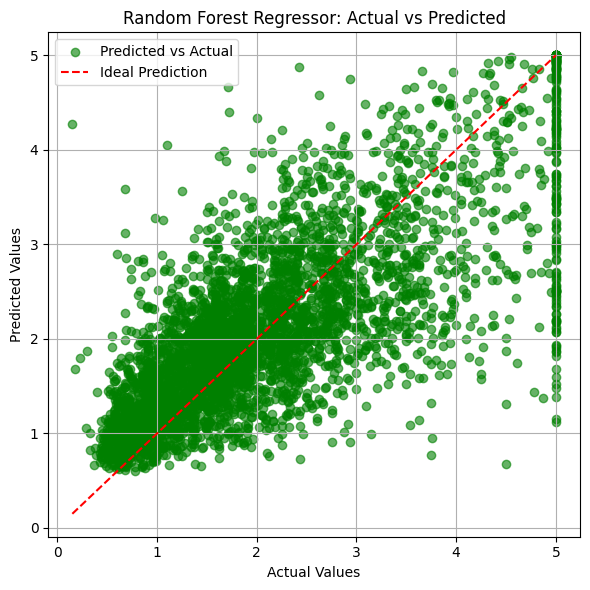

In [30]:
import matplotlib.pyplot as plt
# Setting up the figure
plt.figure(figsize=(6, 6))
# Creating a scatter plot of actual vs predicted values
plt.scatter(y_test, y_predict_random, alpha=0.6, color='green', label='Predicted vs Actual')
# Plotting the ideal prediction line (y = x)
min_val = min(y_test.min(), y_predict_random.min())
max_val = max(y_test.max(), y_predict_random.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
# Adding the axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted')
# Adding grid and legend for better readability
plt.legend()
plt.grid(True)
# Showing the plot
plt.tight_layout()
plt.show()

### Gradient Booster.

#### Evaluation

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initializing and train the Gradient Boosting Regressor
GradientBoosterModel = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
GradientBoosterModel.fit(x_train_scaled, y_train)
# Making the predictions on the test set
y_predict_gradient = GradientBoosterModel.predict(x_test_scaled)
# Computing evaluation metrics
mse_gradient = mean_squared_error(y_test, y_predict_gradient)
mae_gradient = mean_absolute_error(y_test, y_predict_gradient)
r2_gradient = r2_score(y_test, y_predict_gradient)
# Displaying the results
print("Gradient Boosting Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE):{mse_gradient:.4f}")
print(f"Mean Absolute Error (MAE):{mae_gradient:.4f}")
print(f"R-squared Score (R²):{r2_gradient:.4f}")

Gradient Boosting Regressor Evaluation Metrics:
Mean Squared Error (MSE):0.5538
Mean Absolute Error (MAE):0.5347
R-squared Score (R²):0.5774


##### The predictions from the Gradient Boosting Regressor are significantly better compared to the Random Forest, Decision Tree, and Linear Regression models. It achieves a higher R-squared value (coefficient of determination), indicating stronger predictive performance and a better fit to the data.

#### **Visualization**

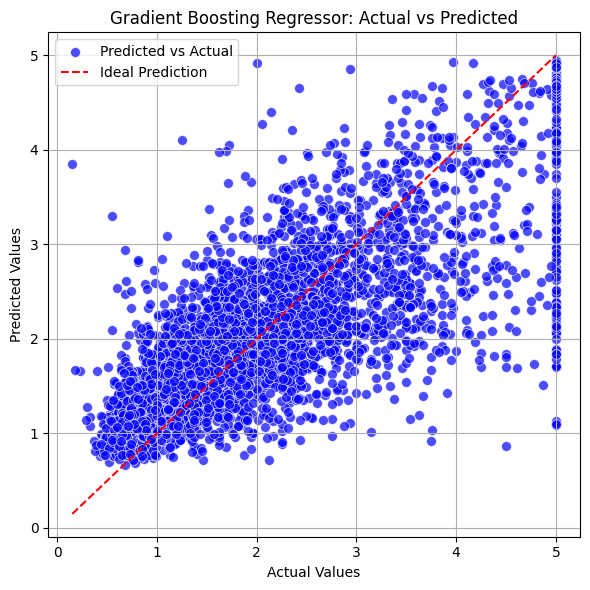

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the figure size
plt.figure(figsize=(6, 6))
# Scattering plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_predict_gradient, color='blue', s=50, alpha=0.7, label='Predicted vs Actual')
# Plotting the ideal prediction line (y = x)
min_val = min(y_test.min(), y_predict_gradient.min())
max_val = max(y_test.max(), y_predict_gradient.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label='Ideal Prediction')
# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: Actual vs Predicted")
# Adding grid and legend
plt.grid(True)
plt.legend()
# Displaying the plot
plt.tight_layout()
plt.show()

### Support Vector

#### Evaluation

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initializing and training the SVR model
SupportVectorModel = SVR(kernel='rbf', C=1.0, epsilon=0.2)
SupportVectorModel.fit(x_train_scaled, y_train)
# Making predictions
y_predict_sv = SupportVectorModel.predict(x_test_scaled)
# Calculating evaluation metrics
mse_sv = mean_squared_error(y_test, y_predict_sv)
mae_sv = mean_absolute_error(y_test, y_predict_sv)
r2_sv = r2_score(y_test, y_predict_sv)
# Displaying the results
print("Support Vector Regressor (SVR) Evaluation Metrics:")
print(f"Mean Squared Error (MSE):{mse_sv:.4f}")
print(f"Mean Absolute Error (MAE):{mae_sv:.4f}")
print(f"R-squared Score (R²):{r2_sv:.4f}")

Support Vector Regressor (SVR) Evaluation Metrics:
Mean Squared Error (MSE):0.5705
Mean Absolute Error (MAE):0.5207
R-squared Score (R²):0.5647


##### The model shows a low MSE and MAE along with a high R-squared value, indicating decent performance. However, its predictions are not as strong or accurate as those of the Gradient Boosting Regressor.

#### **Visualization**

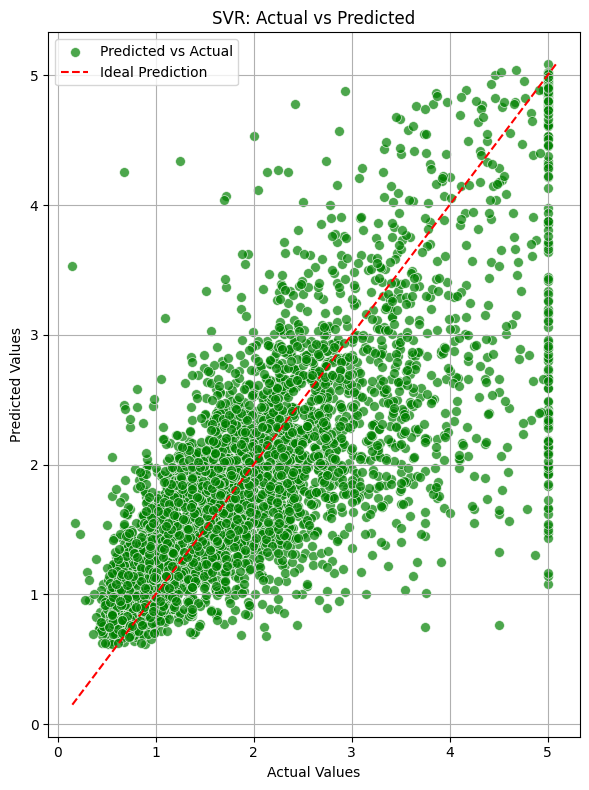

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 8))
# Scattering the plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_predict_sv, color='green', s=50, alpha=0.7, label='Predicted vs Actual')
# Plotting ideal prediction line (y = x)
min_val = min(y_test.min(), y_predict_sv.min())
max_val = max(y_test.max(), y_predict_sv.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label='Ideal Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **Final Evaluation**

In [46]:
print("\nModel Comparison (R² Scores):")
print(f"Linear Regression:{r2:.4f}")
print(f"Decision Tree:{r2_Data:.4f}")
print(f"Random Forest:{r2_random:.4f}")
print(f"Gradient Boosting:{r2_gradient:.4f}")
print(f"Support Vector Regressor (SVR): {r2_sv:.4f}")


Model Comparison (R² Scores):
Linear Regression:0.4972
Decision Tree:0.1559
Random Forest:0.5439
Gradient Boosting:0.5774
Support Vector Regressor (SVR): 0.5647


##### Based on the coefficient of determination (R²) and other evaluation metrics, Gradient Boosting emerges as the best model for training and prediction. SVR takes the second place, followed by Random Forest. The Decision Tree performs the worst among these models. To effectively handle this complex and nonlinear dataset, Gradient Boosting, SVR, and Random Forest are the top choices, as they achieve low error metrics (MSE, MAE) and high R² scores close to 1, indicating strong predictive performance.

<div style="text-align: center;">
<strong>END OF THE PROCESS</strong>
</div>